Import All The Necessary Library

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Using Boston Housing Dataset for this Model representation

In [28]:
boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The description of all the features is given below
CRIM : Per capita crime rate by town
ZN : Proportion of residental land zoned for lots over 25000 sq.ft
INDUS : Proportion of non retail business acres per town
CHAS : Charles river dummy variable(= 1 if tract bounds river,0 otherwise)
NOX  : Nitric oxides concentration (parts per ten million)
RM   : Average number of rooms per dwelling
AGE :  Proportion of owner-occupied units built prior to 1940
DIS : Weighted distances to five boston employment centers
RAD : Index of access to radial highways
TAX : Full-value property tax rate per $10,000
B : 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
LSTAT : % lower status of the population
MEDV : Median value of owner-occupied homes in $1000's

Convert Column names from lower case to upper case (in capital)

In [3]:
boston.columns = boston.columns.str.upper()
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Data Preprocessing

Searching For Null Values

In [4]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

finding Outlier

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'CRIM'),
  Text(1, 0, 'ZN'),
  Text(2, 0, 'INDUS'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'NOX'),
  Text(5, 0, 'RM'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'DIS'),
  Text(8, 0, 'RAD'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'B'),
  Text(12, 0, 'LSTAT'),
  Text(13, 0, 'MEDV')])

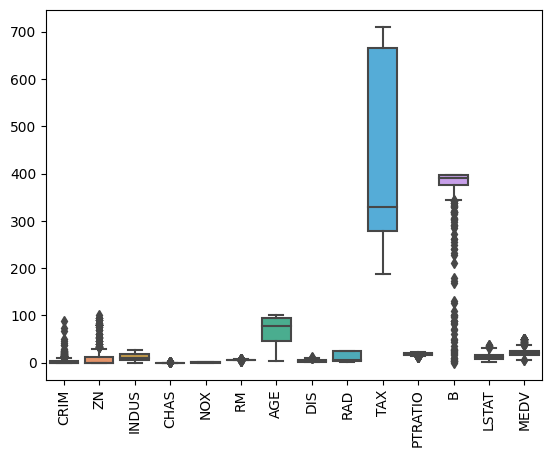

In [5]:
# Visualization of the outliers in data
sns.boxplot(data=boston)
plt.xticks(rotation = 90)

Feature B has maximum amount of outliers

<AxesSubplot: >

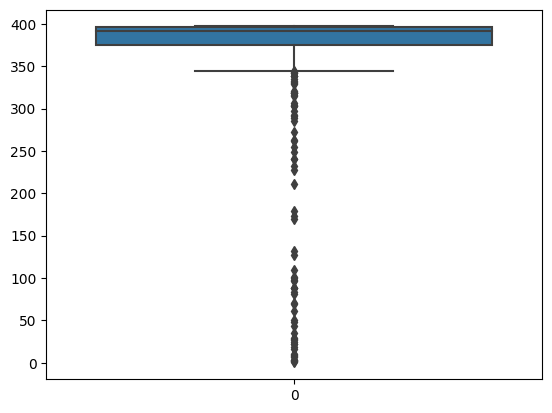

In [6]:
sns.boxplot(boston['B'])

In [7]:
# Correlation Matrix
correlation_mat = boston.corr().round(2)
correlation_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<AxesSubplot: >

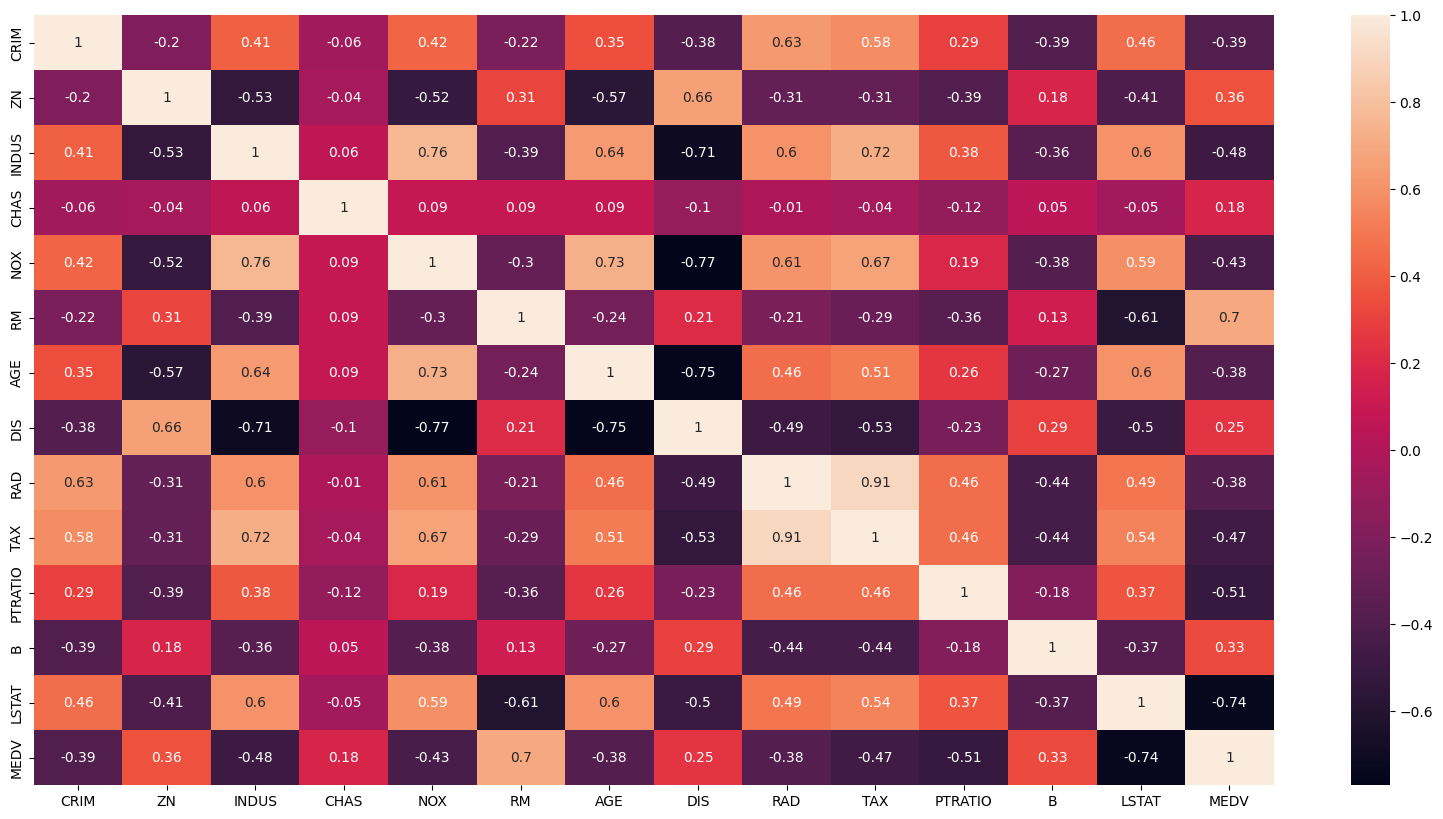

In [8]:
# For better visualization
plt.figure(figsize = [20, 10])
sns.heatmap(correlation_mat, annot=True)

In [9]:
# Observation MEDV is highly correlated to LSTAT and RM
# Observation RAD is highly correlated to TAX

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

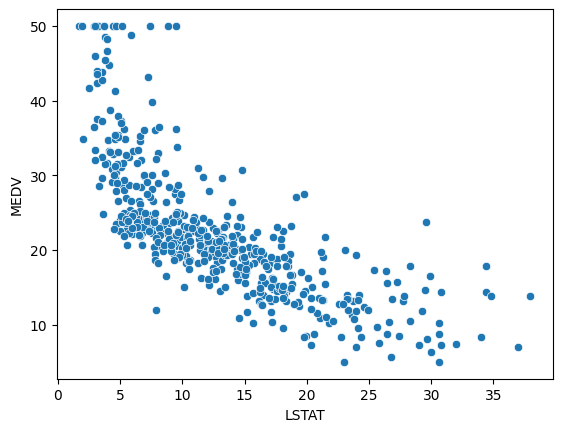

In [10]:
sns.scatterplot(data=boston, x = 'LSTAT', y = 'MEDV')

In [11]:
output = boston['MEDV']
input = boston.drop('MEDV', axis = 1)

Splitting the model into train and test

In [12]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train, output_test = train_test_split(input, output, test_size = 0.2, random_state= 34)
print(input_test.shape)
print(input_train.shape)
print(output_test.shape)
print(output_train.shape)

(102, 13)
(404, 13)
(102,)
(404,)


Applying Model (Linear Regression)

In [13]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(input_train, output_train)

LinearRegression()

In [14]:
print(lin_model.coef_)
print(lin_model.intercept_)

[-1.08359151e-01  5.36488631e-02  5.08830548e-02  2.41421254e+00
 -1.78573029e+01  3.32600217e+00  9.26886030e-03 -1.41227046e+00
  3.05119131e-01 -1.14196466e-02 -9.91036143e-01  9.20190102e-03
 -5.80341086e-01]
39.386836899007164


In [15]:
y_prediction = lin_model.predict(input_train)
y_prediction

array([24.20338159, 27.19409907, 23.97757302, 13.39833585, 30.44167676,
       16.58111517, 27.36589401, 16.12637203, 30.70176882, 19.34046433,
       22.42916099,  7.9029156 , 30.37330273, 23.6437143 , 13.59090888,
       25.44094686, 19.46442117, 20.34847237, 11.66901142, 44.17077756,
       25.09949149,  8.85060525, 18.33276827, 27.45228795, 14.43010469,
       21.97026452, 16.44682541, 23.37484618, 16.32972322, 19.48020146,
        6.43041463, 34.51455409, 20.72719602, 16.73837103, 13.81949019,
       30.2995609 , 16.55045037, 34.16287963, 28.4361981 , 22.28230948,
       34.18754022, 34.45852381, 23.36050098, 25.27487974, 14.07410359,
       21.51929058, 21.12329668, 15.96673777, 18.82812521, 25.11126345,
       16.741461  , 32.93752267, 15.45581378, 32.58227566, 31.14592538,
        7.92019159, 22.01001586,  4.18435659, 30.23477788, 29.65410191,
        8.56809522, 11.62952893, 17.59019318, 20.7600907 , 36.41831469,
       20.38233439, 11.74976074, 32.40693914, 40.59876087, 22.07

Measuring Performance of the Training and testing data

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

Training Model

In [17]:
print('MSE: ', mean_squared_error(output_train, y_prediction))
print('MAE: ', mean_absolute_error(output_train, y_prediction))
print('RMSE: ', np.sqrt(mean_squared_error(output_train, y_prediction)))
print('MAPE: ', mean_absolute_percentage_error(output_train, y_prediction))

MSE:  22.256979931340712
MAE:  3.304316577713613
RMSE:  4.71773037925449
MAPE:  0.16382847953202295


In [18]:
print("r2_score: ", r2_score(output_train, y_prediction))

r2_score:  0.7378759440227874


Testing the model

In [19]:
y_prediction_test = lin_model.predict(input_test)
y_prediction_test 

array([24.62959186, 34.87461133, 19.38287343, 24.39457793, 26.06381084,
       31.18987403, 16.83529876, 13.26631187, 25.01964085, 22.55582656,
       11.06819783, 27.03598685, 30.84586025, 21.21422266, 37.00583964,
       15.48102522, 20.35930415, 29.64126967, 20.22334881, 30.88698727,
       19.72441268, 12.76759276, 25.46917989, 33.52626975, 19.96565934,
       24.72578265, 20.42401881, 19.36574266, 24.06479371, 17.74889767,
        3.52443598, 32.03591195, 36.42314438, 21.33370232, 25.69633193,
       20.7374826 , 16.53026844, 24.99119034, 20.81343964, 27.37165813,
       18.26422926, 18.11430055, 13.22221008,  0.773952  , 21.44847952,
       19.8242991 ,  9.87618521, 40.35703968, 24.30465963, 17.19463911,
       32.82124261, 24.70637479, 26.17910478, 30.84186693, 15.17077981,
       21.23140645, 23.11024242, 28.2630953 , 21.12159023, 17.40712978,
       18.26674206, 18.9745112 , 22.30873786, 18.44498641, 19.59920969,
       18.39903998, 13.14908471, 30.19583508, 24.68354842, 14.57

In [20]:
print('MSE: ', mean_squared_error(output_test, y_prediction_test))
print('MAE: ', mean_absolute_error(output_test, y_prediction_test))
print('RMSE: ', np.sqrt(mean_squared_error(output_test, y_prediction_test)))
print('MAPE: ', mean_absolute_percentage_error(output_test, y_prediction_test))
print('r2_score: ', r2_score(output_test, y_prediction_test))

MSE:  21.14529396988256
MAE:  3.25490601595427
RMSE:  4.598401240635984
MAPE:  0.1680873186075263
r2_score:  0.7433987333552777


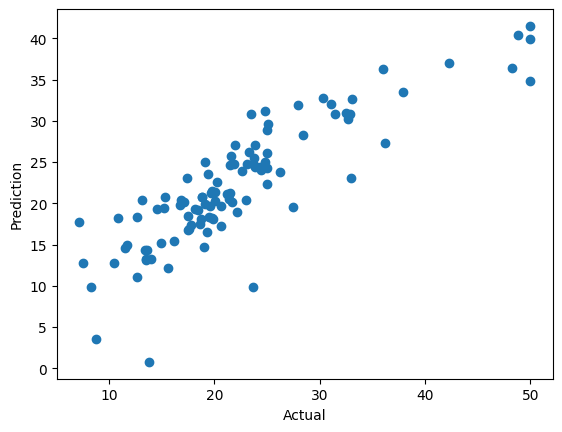

In [21]:
plt.scatter(output_test, y_prediction_test)

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

Applying Linear Regression With Scaling Our Train Data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_train_scaled = scaler.fit_transform(input_train)
input_train_scaled.mean(axis = 0)

array([ 8.79384574e-18,  4.83661516e-17,  1.22014610e-16, -4.83661516e-17,
        8.79384574e-18,  1.53892300e-15, -3.07784601e-17,  1.06625380e-16,
       -7.91446117e-17, -1.27510763e-16,  8.09033808e-16, -4.00119981e-16,
        4.61676901e-17])

In [23]:
input_test_scaled = scaler.transform(input_test)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(input_train_scaled, output_train)

LinearRegression()

In [25]:
y_pred = lin_reg.predict(input_train_scaled)

In [26]:
print(mean_squared_error(output_train, y_pred))
print(r2_score(output_train, y_pred))
# Predicting the test set results
y_pred_test = lin_reg.predict(input_test_scaled)
print(mean_squared_error(output_test, y_pred_test))
print(r2_score(output_test, y_pred_test))

22.25697993134071
0.7378759440227876
21.145293969882594
0.7433987333552773
